In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Leemos el dataset
data = pd.read_csv("dataset/linear_regression/Real estate.csv")

# Visualizamos los primeros 10 datos.
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
# Vemos la columnas del dataset.
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
# Para referirnos a una columna en específico debemos hacerlo con la notación de arreglo.
data["X2 house age"] # Tiempo de la casa desde su construcción. En años.

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [5]:
# Podemos conseguir información del dataset con el siguiente método
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
X_features = data.drop(["Y house price of unit area", "No"], axis=1)
Y_feature = data.drop(["No", "X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
               "X4 number of convenience stores", "X5 latitude", "X6 longitude"], axis=1)
X = X_features.to_numpy(dtype=np.float64)
y = Y_feature.to_numpy(dtype=np.float64)
# Dividimos el dataset en dos partes, entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Regresión Lineal

# Modelo usando vectorización.
def model(w, X, b):
    return np.dot(X, w) + b

# Modelo sin usar vectorización.
def model_dummy(w, X, b):
    n = X.shape[0]
    total = 0
    for i in range(n):
        total += w[i]*X[i]
    return total + b

# Función de costo vectorizada (se tiene que optimizar, es el fin de la regresión lineal).
def cost_function(w, X, b, Y):
    m = X.shape[0]
    return (1 / (2 * m)) * np.sum(np.square(model(w, X, b) - Y)) # Usamos vectorización.

# Función de costo no vectorizada.
def cost_function_dummy(w, X, b, Y):
    m = X.shape[0]
    total = 0
    for i in range(m):
        total += (model_dummy(w, X[i], b) - Y[i]) ** 2
    return (1 / (2 * m)) * total

def derivative_of_w_dummy(w, X, b, Y):
    m, n = X.shape
    total = np.zeros(n)
    # print("m: " + str(m))
    # print("n: " + str(n))
    for i in range(n):
        for j in range(m):
            # print("{}*{} + {}*{} + {}*{} - {}: {} ".format(w[0], X[j, 0], w[1], X[j, 1], 
            #                                               w[2], X[j, 2], b, model_dummy(w, X[j], b) - Y[j]))
            # print("X[{}, {}]: ".format(j, i) + str(X[j, i]))
            total[i] += (model_dummy(w, X[j], b) - Y[j]) * X[j, i]
    return (1 / m) * total

# Vectorización
def derivative_of_w(w, X, b, Y):
    m = X.shape[0]
    return (1 / m) * np.sum(np.dot(model(w, X, b) - Y, X))

def derivative_of_b_dummy(w, X, b, Y):
    m, n = X.shape
    total = 0
    for i in range(n):
        for j in range(m):
            total += (model_dummy(w, X[j], b) - Y[j])
    return (1 / m) * total

# Vectorización
def derivative_of_b(w, X, b, Y):
    m = X.shape[0]
    return (1 / m) * np.sum(model(w, X, b) - Y)

# Sin vectorización
def gradient_descent_dummy(num_iter, alpha, w, X, b, Y, n):
    history_of_cost_function = []
    iterations = []
    for i in range(num_iter):
        temp_w = w - alpha * derivative_of_w_dummy(w, X, b, Y)
        temp_b = b - alpha * derivative_of_b_dummy(w, X, b, Y)
        w = temp_w
        b = temp_b
        if i % n == 0:
            history_of_cost_function.append(cost_function_dummy(w, X, b, Y))
            iterations.append(i)
    return (w, b, history_of_cost_function, iterations)

def make_predictions_dummy(X, w, b):
    n = X.shape[0]
    predictions = []
    for i in range(n):
        predictions.append(model_dummy(w, X[i], b))
    return predictions

def plot_predictions_against_actual_value(X, Y, predictions, 
                                          label_of_predictions,
                                          label_of_actual_value,
                                          y_label,
                                          x_label):
    plt.plot(X[:,0], predictions, marker='o', c = 'r', linestyle="none", label=label_of_predictions)
    plt.plot(X[:,0], Y, marker='s', c='b', linestyle="none", label=label_of_actual_value)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

def plot_cost_function_against_iterations(iterations, history):
    plt.plot(iterations, history, marker = "o")
    plt.ylabel("Función costo J(w, b)")
    plt.xlabel("Iteración")
    plt.show()

# print((1 / 4) * np.sum(np.dot(model(w_init, X_example, 0) - y_example, X_example)))
# print(X_example.shape)
# print(cost_function(w, X_example, b, y_example))
# print(cost_function_dummy(w, X_example, b, y_example))
# print((model(w, X_example, 0) - y_example))
# print((model(w, X_example, 0) - y_example) * X_example)
# print(derivative_of_w_dummy(w, X_example, b, y_example))
# print(model(w, X_example, 0) - y_example)
# print(X_example)

w: [0.33084852 0.33431308 0.33777765]
b: 0.010393696250531643


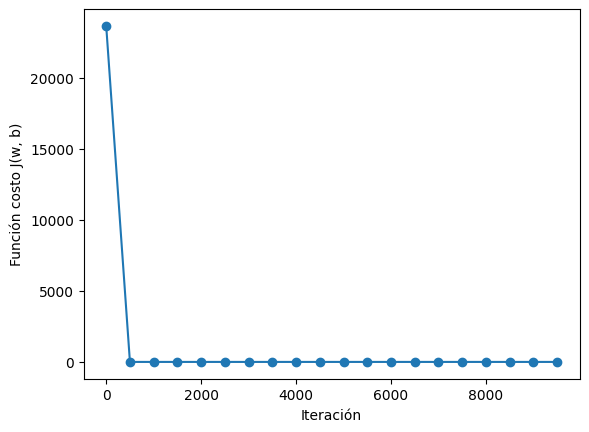

In [33]:
X_example_train = np.array([[1, 2, 3], 
                      [4, 5, 6], 
                      [7, 8, 9], 
                      [10, 11, 12], 
                      [13, 14, 15],
                      [16, 17, 18],
                      [19, 20, 21],
                      [22, 23, 24],
                      [25, 26, 27],
                      [28, 29, 30],
                      [31, 32, 33],
                      [34, 35, 36],
                      [37, 38, 39],
                      [40, 41, 42],
                      [43, 44, 45],
                      [46, 47, 48],
                      [49, 50, 51],
                      [52, 53, 54],
                      [55, 56, 57],
                      [58, 59, 60],
                      [61, 62, 63],
                      [64, 65, 66],
                      [67, 68, 69],
                      [70, 71, 72],
                      [73, 74, 75],
                      [76, 77, 78],
                      [79, 80, 81],
                      [82, 83, 84],
                      [85, 86, 87],
                      [88, 89, 90],
                      [91, 92, 93],
                      [94, 95, 96],
                      [97, 98, 99],
                      [100, 101, 102],
                      [103, 104, 105],
                      [106, 107, 108],
                      [109, 110, 111],
                      [112, 113, 114],
                      [115, 116, 117],
                      [118, 119, 120],
                      [121, 122, 123],
                      [124, 125, 126],
                      [127, 128, 129],
                      [130, 131, 132],
                      [133, 134, 135],
                      [136, 137, 138],
                      [139, 140, 141],
                      [142, 143, 144],
                      [145, 146, 147],
                      [148, 149, 150],
                      [151, 152, 153],
                      [154, 155, 156],
                      [157, 158, 159],
                      [160, 161, 162],
                      [163, 164, 165],
                      [166, 167, 168],
                      [169, 170, 171],
                      [172, 173, 174],
                      [175, 176, 177],
                      [178, 179, 180],
                      [181, 182, 183],
                      [184, 185, 186],
                      [187, 188, 189],
                      [190, 191, 192],
                      [193, 194, 195],
                      [196, 197, 198],
                      [199, 200, 201],
                      [202, 203, 204],
                      [205, 206, 207],
                      [208, 209, 210],
                      [211, 212, 213],
                      [214, 215, 216],
                      [217, 218, 219],
                      [220, 221, 222],
                      [223, 224, 225],
                      [226, 227, 228],
                      [229, 230, 231],
                      [232, 233, 234],
                      [235, 236, 237],
                      [238, 239, 240],
                      [241, 242, 243],
                      [244, 245, 246],
                      [247, 248, 249],
                      [250, 251, 252],
                      [253, 254, 255],
                      [256, 257, 258],
                      [259, 260, 261],
                      [262, 263, 264],
                      [265, 266, 267],
                      [268, 269, 270],
                      [271, 272, 273],
                      [274, 275, 276],
                      [277, 278, 279],
                      [280, 281, 282],
                      [283, 284, 285],
                      [286, 287, 288],
                      [289, 290, 291],
                      [292, 293, 294],
                      [295, 296, 297],
                      [298, 299, 300],
                      [301, 302, 303],
                      [304, 305, 306],
                      [307, 308, 309],
                      [310, 311, 312],
                      [313, 314, 315],
                      [316, 317, 318],
                      [319, 320, 321],
                      [322, 323, 324],
                      [325, 326, 327],
                      [328, 329, 330],
                      [331, 332, 333],
                      [334, 335, 336],
                      [337, 338, 339],
                      [340, 341, 342],
                      [343, 344, 345],
                      [346, 347, 348],
                      [349, 350, 351],
                      [352, 353, 354],
                      [355, 356, 357],
                      [358, 359, 360],
                      [361, 362, 363],
                      [364, 365, 366],
                      [367, 368, 369],
                      [370, 371, 372],
                      [373, 374, 375],
                      [376, 377, 378],
                      [379, 380, 381],
                      [382, 383, 384],
                      [385, 386, 387],
                      [388, 389, 390],
                      [391, 392, 393],
                      [394, 395, 396],
                      [397, 398, 399],
                      [400, 401, 402],
                      [403, 404, 405],
                      [406, 407, 408],
                      [409, 410, 411],
                      [412, 413, 414],
                      [415, 416, 417],
                      [418, 419, 420],
                      [421, 422, 423],
                      [424, 425, 426],
                      [427, 428, 429],
                      [430, 431, 432],
                      [433, 434, 435],
                      [436, 437, 438],
                      [439, 440, 441],
                      [442, 443, 444],
                      [445, 446, 447],
                      [448, 449, 450],
                      [451, 452, 453],
                      [454, 455, 456],
                      [457, 458, 459],
                      [460, 461, 462],
                      [463, 464, 465],
                      [466, 467, 468],
                      [469, 470, 471],
                      [472, 473, 474],
                      [475, 476, 477],
                      [478, 479, 480],
                      [481, 482, 483],
                      [484, 485, 486],
                      [487, 488, 489],
                      [490, 491, 492],
                      [493, 494, 495],
                      [496, 497, 498],
                      [499, 500, 501]])
y_example_train = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201,
                      204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312,315,318,321,324,327,330,333,336,339,342,345,348,351,354,357,360,363,366,369,372,375,378,381,384,387,390,393,396,399,402,405,408,411,414,417,420,423,426,
                      429,432,435,438,441,444,447,450,453,456,459,462,465,468,471,474,477,480,483,486,489,492,495,498,501]) 
b = 0
w_init = np.array([0, 0, 0])
alpha = 0.000001
num_iter = 10000
w, b, history, iterations = gradient_descent_dummy(num_iter, alpha, w_init, X_example_train, b, y_example_train, 500)
print("w: " + str(w)) # Pesos óptimos encontrados después del número de iteraciones.
print("b: " + str(b)) # Bias óptimos después del número de iteraciones.
plot_cost_function_against_iterations(iterations, history)

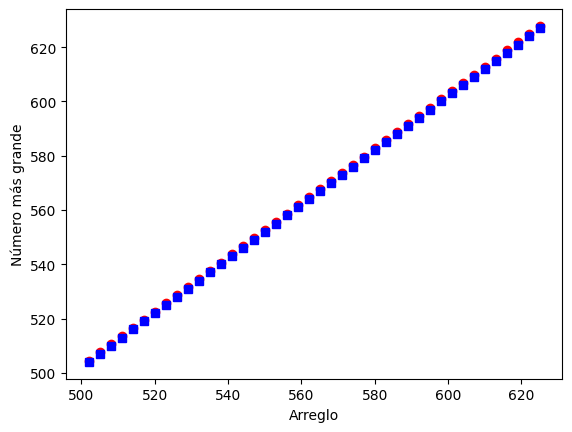

In [35]:
# Test
X_example_test = np.array([[502, 503, 504],
                           [505, 506, 507],
                           [508, 509, 510],
                           [511, 512, 513],
                           [514, 515, 516],
                           [517, 518, 519],
                           [520, 521, 522],
                           [523, 524, 525],
                           [526, 527, 528],
                           [529, 530, 531],
                           [532, 533, 534],
                           [535, 536, 537],
                           [538, 539, 540],
                           [541, 542, 543],
                           [544, 545, 546],
                           [547, 548, 549],
                           [550, 551, 552],
                           [553, 554, 555],
                           [556, 557, 558],
                           [559, 560, 561],
                           [562, 563, 564],
                           [565, 566, 567],
                           [568, 569, 570],
                           [571, 572, 573],
                           [574, 575, 576],
                           [577, 578, 579],
                           [580, 581, 582],
                           [583, 584, 585],
                           [586, 587, 588],
                           [589, 590, 591],
                           [592, 593, 594],
                           [595, 596, 597],
                           [598, 599, 600],
                           [601, 602, 603],
                           [604, 605, 606],
                           [607, 608, 609],
                           [610, 611, 612],
                           [613, 614, 615],
                           [616, 617, 618],
                           [619, 620, 621],
                           [622, 623, 624],
                           [625, 626, 627]])
y_example_test = np.array([504, 507, 510, 
                           513, 516, 519, 
                           522, 525, 528, 
                           531, 534, 537, 
                           540, 543, 546, 
                           549, 552, 555, 
                           558, 561, 564, 
                           567, 570, 573, 
                           576, 579, 582, 
                           585, 588, 591, 
                           594, 597, 600, 
                           603, 606, 609, 
                           612, 615, 618, 
                           621, 624, 627])
predictions = make_predictions_dummy(X_example_test, w, b)
plot_predictions_against_actual_value(X_example_test, y_example_test,
                                      predictions, "Predicción del modelo",
                                      "Valor actual", "Número más grande", "Arreglo")


In [9]:
# Ejecución de descenso de gradiente.
num_iter = 100000
alpha = 0.000000001
n = X_train.shape[1]
w_init = np.zeros(n)
b = 0
w, b, history, iterations = gradient_descent_dummy(num_iter, alpha, w_init, X_train, b, y_train, 1000)
print("w: " + str(w))
print("b: " + str(b))

TypeError: gradient_descent_dummy() missing 1 required positional argument: 'n'

[array([793.38221625]), array([730.76356816]), array([674.45734019]), array([623.79681819]), array([578.18642082]), array([537.09409421]), array([500.04452012]), array([466.6130506]), array([436.42029138]), array([409.12726468]), array([384.43108929]), array([362.06112284]), array([341.77551655]), array([323.35813854]), array([306.61582616]), array([291.37593218]), array([277.48413342]), array([264.80247373]), array([253.20761624]), array([242.58928253]), array([232.84885868]), array([223.89815038]), array([215.65827118]), array([208.05864956]), array([201.03614216]), array([194.53424189]), array([188.50237058]), array([182.89524731]), array([177.67232426]), array([172.79728284]), array([168.23758362]), array([163.96406448]), array([159.95058155]), array([156.17368858]), array([152.61235062]), array([149.24768813]), array([146.06274858]), array([143.04230229]), array([140.17266021]), array([137.44151101]), array([134.83777566]), array([132.35147747]), array([129.97362597]), array([127.

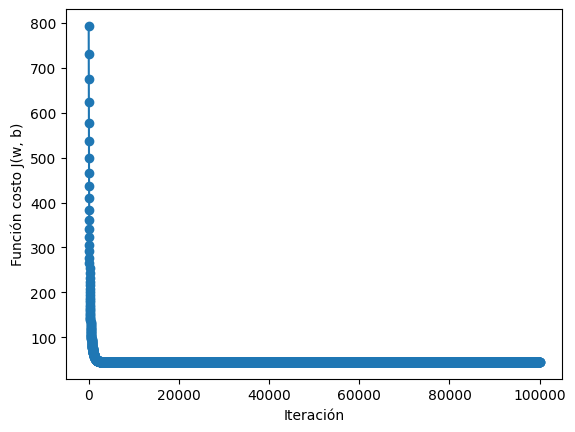

In [ ]:
plt.plot(iterations, history, marker = "o")
plt.ylabel("Función costo J(w, b)")
plt.xlabel("Iteración")
print(history)

In [ ]:
predictions = []
l = X_test.shape[0]
for i in range(l):
    predictions.append(model_dummy(w, X_test[i], b))


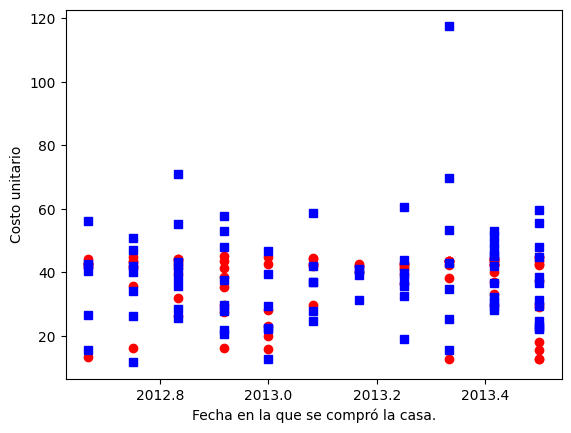

In [ ]:
plt.plot(X_test[:,0], predictions, marker='o', c = 'r', linestyle="none", label="Predicción")
plt.plot(X_test[:,0], y_test, marker='s', c='b', linestyle="none", label="Costo real de la casa.")
plt.ylabel("Costo unitario")
plt.xlabel("Fecha en la que se compró la casa.")
plt.show()